<a href="https://colab.research.google.com/github/kunai-3txk/MachineLearning/blob/main/20221023_Lifelines_cox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 32.0 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=77c387393914f380afa8740d85355183f2e22c61d0c42a93d862123a3c8f0d9f
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.4 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions

In [3]:
from lifelines.datasets import load_rossi

rossi = load_rossi()
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


week	釈放後の最初の逮捕までの週数、または打ち切り

arrest	逮捕の有無 (1:有)	

fin	財政援助の有無 (1:有)	

age	釈放時の年齢	

race	黒人かどうか (1:黒人)

wexp	労働経験の有無 (1:有)	

mar	釈放時の婚姻状況 (1:結婚)	

paro	仮釈放かどうか (1:仮釈放)	

prio	過去の受刑回数

In [5]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')  # duration:生存時間

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2022-10-23 12:02:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

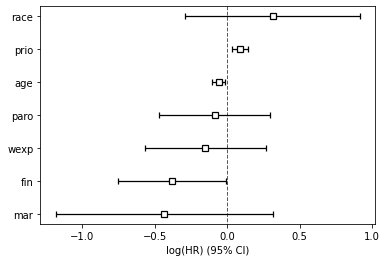

In [6]:
cph.plot()

■ 生存関数の予測

In [7]:
X = rossi
result = cph.predict_survival_function(X)

In [8]:
rossi.iloc[0:2]

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8


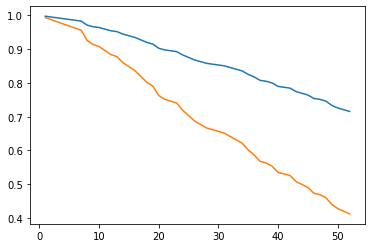

In [9]:
sample0 = result.iloc[:, 0]
sample1 = result.iloc[:, 1]

import matplotlib.pyplot as plt
plt.plot(sample0.index, sample0)
plt.plot(sample1.index, sample1)

■ Formula

In [11]:
cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -659.39
         time fit was run = 2022-10-23 12:24:18 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.03       0.97       0.03            -0.09             0.03                 0.92                 1.03
fin        -0.33       0.72       0.19            -0.70             0.04                 0.49                 1.05
prio        0.31       1.36       0.17            -0.03             0.64                 0.97                 1.90
wexp       -0.24       0.79       0.21            -0.65             0.17                 0.52                 1.19
age:prio   -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01

            cmp to     z    p   -log2(p)
covariate                               
age           0.00 -0.93 0.35       1.51
fin           0.00 -1.73 0.08       3.57
prio          0.00  1.80 0.07       3.80
wexp          0.00 -1.14 0.26       1.97
age:prio      0.00 -1.28 0.20       2.32
---
Concordance = 0.64
Partial AIC = 1328.77
log-likelihood ratio test = 31.99 on 5 df
-log2(p) of ll-ratio test = 17.35

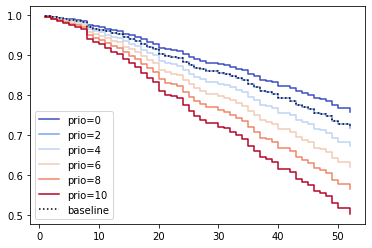

In [12]:
cph.fit(rossi, duration_col='week', event_col='arrest')
cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm')